# 1 Data wrangling<a id='2_Data_wrangling'></a>

## 2.1 Introduction<a id='2.1_Introduction'></a>

This step focuses on collecting the data, organizing it, cleaning it and making sure it's well defined. 

## 2.2 Imports<a id='2.2_Imports'></a>

In [34]:
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from library.sb_utils import save_file
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

## 2.3 Objectives<a id='2.3_Objectives'></a>

## 2.4 Load The CO2 Emission Data

In [3]:
# the supplied xlsx data file is the raw_data directory
co2_raw_data = pd.read_excel('../raw_data/co2_emission_data_with_popu_gdp.xlsx')

In [4]:
#Call the info method on co2_raw_data to see a summary of the data
co2_raw_data.info()
# join temperature, latitude, logitude, by iso_code

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23708 entries, 0 to 23707
Data columns (total 55 columns):
iso_code                               20930 non-null object
country                                23708 non-null object
year                                   23708 non-null int64
annual_co2_prod_Megaton                23170 non-null float64
co2_growth_prct                        21910 non-null float64
co2_growth_abs                         22017 non-null float64
consumption_co2                        3350 non-null float64
trade_co2                              3318 non-null float64
trade_co2_share                        3318 non-null float64
co2_per_capita                         22383 non-null float64
consumption_co2_per_capita             3350 non-null float64
share_global_co2                       23103 non-null float64
cumulative_co2                         23578 non-null float64
share_global_cumulative_co2            23578 non-null float64
co2_per_gdp                    

In [5]:
#Call the head method on co2_raw_data to print the first several rows of the data
co2_raw_data.head()

,iso_code,country,year,annual_co2_prod_Megaton,co2_growth_prct,co2_growth_abs,consumption_co2,trade_co2,trade_co2_share,co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption,energy_per_capita,energy_per_gdp,population,gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,NaN,0.002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7663783.0,NaN
1,AFG,Afghanistan,1950,0.084,475.000,0.070,NaN,NaN,NaN,0.011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7752000.0,1.949480e+10
2,AFG,Afghanistan,1951,0.092,8.696,0.007,NaN,NaN,NaN,0.012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7840000.0,2.006385e+10
3,AFG,Afghanistan,1952,0.092,NaN,NaN,NaN,NaN,NaN,0.012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7936000.0,2.074235e+10
4,AFG,Afghanistan,1953,0.106,16.000,0.015,NaN,NaN,NaN,0.013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8040000.0,2.201546e+10


In [6]:
co2_raw_data.describe()

,year,annual_co2_prod_Megaton,co2_growth_prct,co2_growth_abs,consumption_co2,trade_co2,trade_co2_share,co2_per_capita,consumption_co2_per_capita,share_global_co2,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption,energy_per_capita,energy_per_gdp,population,gdp
count,23708.000000,23170.000000,21910.000000,22017.000000,3350.000000,3318.000000,3318.000000,22383.000000,3350.000000,23103.000000,...,5155.000000,5211.000000,5157.000000,5211.000000,5157.000000,6044.000000,6044.000000,6044.000000,2.107100e+04,1.300200e+04
mean,1951.670997,270.245818,17.705591,5.784158,222.596056,3.673305,27.047046,4.059490,6.556161,5.155362,...,8.099506,82.253370,2.046923,29.308135,0.606690,1638.281196,27401.710621,2.293554,5.927539e+07,4.396605e+11
std,53.828319,1509.911932,290.750382,54.859594,773.261390,100.251878,52.599781,15.339885,7.303592,18.014885,...,9.387477,566.702756,3.534126,199.291118,0.844671,9666.490291,33293.462203,1.681657,3.730743e+08,3.666682e+12
min,1750.000000,-1.165000,-2835.714000,-860.211000,-1.344000,-1487.155000,-118.238000,-2.675000,-0.396000,-0.030000,...,-50.487000,0.000000,0.000000,0.000000,0.000000,0.208000,111.472000,0.048000,1.000000e+03,6.378000e+07
25%,1922.000000,0.546000,-1.070000,-0.011000,8.942000,0.000000,0.000000,0.234000,1.100500,0.006000,...,2.514000,2.150000,0.715000,0.535000,0.228000,46.319000,5829.803000,1.247000,1.333018e+06,8.926728e+09
50%,1965.000000,5.168000,4.361000,0.088000,36.854000,2.348000,16.319500,1.209000,4.040000,0.072000,...,5.474000,9.030000,1.111000,3.590000,0.384000,148.790500,15359.988500,1.823500,4.856304e+06,2.966217e+10
75%,1993.000000,44.799000,11.450750,1.272000,141.397000,9.545500,40.842000,4.632500,9.829750,0.626000,...,10.299000,31.055000,1.690000,10.570000,0.607000,518.953000,37103.698250,2.700500,1.594407e+07,1.210000e+11
max,2019.000000,36441.388000,20100.000000,1667.711000,8959.962000,533.928000,1470.066000,794.334000,58.736000,100.000000,...,86.991000,8660.010000,39.812000,3054.000000,8.239000,153848.433000,317582.244000,14.939000,7.713468e+09,1.065610e+14


In [7]:
type(co2_raw_data)

pandas.core.frame.DataFrame

## 2.5 Explore The Data

### 2.5.1 Find Columns Of Interest

In [8]:
co2_raw_data.columns

Index(['iso_code', 'country', 'year', 'annual_co2_prod_Megaton',
       'co2_growth_prct', 'co2_growth_abs', 'consumption_co2', 'trade_co2',
       'trade_co2_share', 'co2_per_capita', 'consumption_co2_per_capita',
       'share_global_co2', 'cumulative_co2', 'share_global_cumulative_co2',
       'co2_per_gdp', 'consumption_co2_per_gdp', 'co2_per_unit_energy',
       'cement_co2', 'coal_co2', 'flaring_co2', 'gas_co2', 'oil_co2',
       'other_industry_co2', 'cement_co2_per_capita', 'coal_co2_per_capita',
       'flaring_co2_per_capita', 'gas_co2_per_capita', 'oil_co2_per_capita',
       'other_co2_per_capita', 'share_global_coal_co2', 'share_global_oil_co2',
       'share_global_gas_co2', 'share_global_flaring_co2',
       'share_global_cement_co2', 'cumulative_coal_co2', 'cumulative_oil_co2',
       'cumulative_gas_co2', 'cumulative_flaring_co2', 'cumulative_cement_co2',
       'share_global_cumulative_coal_co2', 'share_global_cumulative_oil_co2',
       'share_global_cumulative_gas_c

In [9]:
column = ['iso_code', 'country', 'year', 'annual_co2_prod_Megaton','primary_energy_consumption','population', 'gdp']
# choose one targed variable and one feature to train linear regression
# treat NaN, create categorical featrue
# .isnan, pin that as a new column "_isnan", 
# use fillnan to replace NaN with "1" or mean(), median(), "1" will make coeff easier to be explained.
# coefficient will work for NaN after train the data.
# .score???

In [10]:
co2_data = pd.DataFrame(co2_raw_data, columns = column)

In [11]:
co2_data.head()

,iso_code,country,year,annual_co2_prod_Megaton,primary_energy_consumption,population,gdp
0,AFG,Afghanistan,1949,0.015,NaN,7663783.0,NaN
1,AFG,Afghanistan,1950,0.084,NaN,7752000.0,1.949480e+10
2,AFG,Afghanistan,1951,0.092,NaN,7840000.0,2.006385e+10
3,AFG,Afghanistan,1952,0.092,NaN,7936000.0,2.074235e+10
4,AFG,Afghanistan,1953,0.106,NaN,8040000.0,2.201546e+10


In [12]:
co2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23708 entries, 0 to 23707
Data columns (total 7 columns):
iso_code                      20930 non-null object
country                       23708 non-null object
year                          23708 non-null int64
annual_co2_prod_Megaton       23170 non-null float64
primary_energy_consumption    6044 non-null float64
population                    21071 non-null float64
gdp                           13002 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.3+ MB


In [13]:
missing = pd.concat([co2_data.isnull().sum(), 100 * co2_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count', '%'],ascending=False)

,count,%
primary_energy_consumption,17664,74.506496
gdp,10706,45.157753
iso_code,2778,11.717564
population,2637,11.122828
annual_co2_prod_Megaton,538,2.269276
country,0,0.000000
year,0,0.000000


In [31]:
co2_energy_data = co2_data.groupby('country')['primary_energy_consumption'].mean().sort_values(ascending=False)
co2_energy_data.head(50)

country
World                   96268.492250
United States           21604.201947
China                   12098.535923
Russia                   8190.394531
Japan                    4462.682351
Germany                  3701.785614
India                    2968.743365
Canada                   2720.967421
United Kingdom           2431.474211
France                   2359.570632
Ukraine                  1815.220562
Brazil                   1672.067308
Italy                    1654.387228
South Korea              1431.100462
Mexico                   1252.000365
Saudi Arabia             1140.888192
Iran                     1133.397596
Poland                   1124.294439
Spain                    1051.391421
Australia                1004.518175
South Africa              960.132827
Nigeria                   879.146409
Netherlands               842.964316
Indonesia                 815.415173
United Arab Emirates      771.365000
Taiwan                    671.412846
Kazakhstan                647.

In [23]:
# find out how many data are missing for each country's energy consumption

United Kingdom              270
Europe                      270
Europe (excl. EU-27)        270
EU-28                       270
World                       270
                           ... 
French Equatorial Africa      9
French West Africa            9
Leeward Islands               7
Kuwaiti Oil Fires             1
Puerto Rico                   1
Name: country, Length: 236, dtype: int64

In [41]:
""" prepare data
x: regressor
y: predictor
reshape: make it two dimentional - one column and many rows
y can also be 2 dimensional
"""
x = np.array(co2_data['primary_energy_consumption'].fillna(1)).reshape((-1, 1))
y = np.array(co2_data['annual_co2_prod_Megaton'].fillna(1)).reshape((-1, 1))
print(x,y)

[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]] [[ 0.015]
 [ 0.084]
 [ 0.092]
 ...
 [10.247]
 [11.341]
 [10.374]]


In [42]:
# create a model and fit it
model = LinearRegression()
model = model.fit(x, y)
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [48]:
'''get result y = b0 + b1x'''
r_sq = model.score(x, y)
print('coefficient of determination(𝑅²) :', r_sq)

b0 = model.intercept_
print('intercept:', model.intercept_)
b1 = model.coef_
print('slope:', model.coef_)

yy = b0+ b1*x
print(yy)

coefficient of determination(𝑅²) : 0.6007277964900879
intercept: [165.96010728]
slope: [[0.23464555]]
[[166.19475283]
 [166.19475283]
 [166.19475283]
 ...
 [166.19475283]
 [166.19475283]
 [166.19475283]]


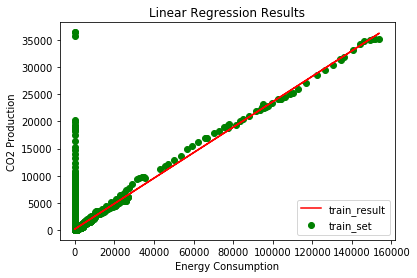

In [54]:
plt.title('Linear Regression Results')
plt.scatter(x, y, color='green', label='train_set')
plt.plot(x,yy,color='red', label='train_result')
plt.legend()
plt.xlabel('Energy Consumption')
plt.ylabel('CO2 Production')
plt.show()